# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy import stats


df = pd.read_csv('data/human_body_temperature.csv')

# Explore the data

In [2]:
# Your work here.
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
df.shape

(130, 3)

In [4]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


# #1

Is the distribution of body temperatures normal?

Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully, it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.

Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways.

In [5]:
# ECDF Function

def ecdf(data):

#     (np.array) - >>> (np.array,np.array)
    

    n = len(data)
    x = np.sort(data)
    y = np.arange(1,len(data)+1)/n
    
    return x,y

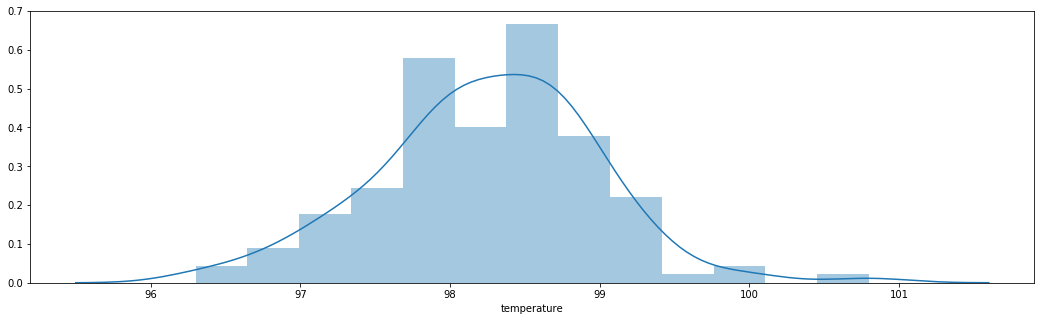

In [6]:
plt.subplots(figsize=(18,5))
sns.distplot(df.temperature)

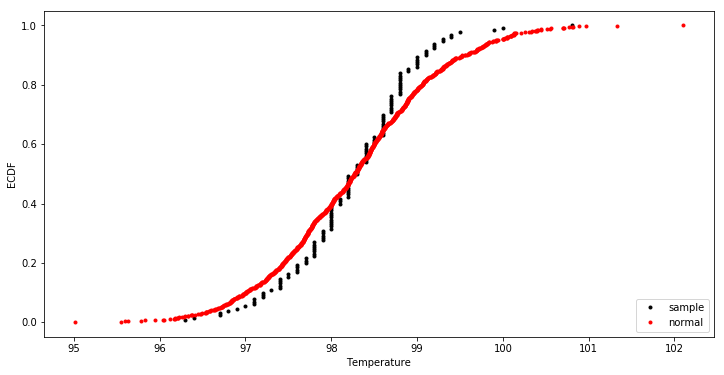

In [7]:
plt.subplots(figsize=(12,6))
x,y=ecdf(df.temperature)
plt.plot(x,y,marker='.',linestyle='none',color='black')

np.random.seed(42)
nrmldist = np.random.normal(np.mean(df.temperature),size=1000)
x_n,y_n = ecdf(nrmldist)
plt.plot(x_n,y_n,marker='.',linestyle='none',color='red')

plt.xlabel('Temperature')
plt.ylabel('ECDF')
plt.legend(['sample','normal'],loc='lower right')

plt.show()

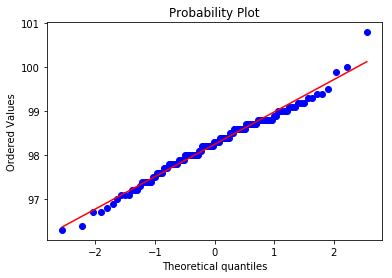

In [8]:
stats.probplot(df.temperature, dist="norm", plot=plt)
plt.show()

In [9]:
stats.normaltest(df.temperature)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

In [10]:
print(stats.kurtosistest(df.temperature));
print(stats.skewtest(df.temperature))

KurtosistestResult(statistic=1.6441851280847679, pvalue=0.10013796794683075)
SkewtestResult(statistic=-0.021370491432771001, pvalue=0.98295011261353815)


In [11]:
stats.shapiro(df.temperature)

(0.9865770936012268, 0.233174666762352)

When I compared two ECDF plots, I could easily see that the simulated sample created by the mean of the sample mean and the sample data almost overlap together. 

H0 = Temperature data come from the normal distribution.
p = .05

We cannot reject the nul hypotesis since our pvalue is greater than .05. We can assume the data to be normally distributed.

# 2

Is the sample size large? Are the observations independent?

Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.

The Central Limit Theorem states that if you have a population with mean μ and standard deviation σ and take sufficiently large random samples from the population with replacementtext annotation indicator, then the distribution of the sample means will be approximately normally distributed. This will hold true regardless of whether the source population is normal or skewed, _* provided the sample size is sufficiently large (usually n > 30) *_. If the population is normal, then the theorem holds true even for samples smaller than 30. In fact, this also holds true even if the population is binomial, provided that min(np, n(1-p))> 5, where n is the sample size and p is the probability of success in the population. This means that we can use the normal probability model to quantify uncertainty when making inferences about a population mean based on the sample mean.

For the random samples we take from the population, we can compute the mean of the sample means:

In [12]:
sample_size = len(df.temperature)
df.temperature.shape

(130,)

Our sample size is not large enough. ** However it is greater than the sample size required for CLT (30)**. We can assume that the measurements are independent since these come from different person and these people are not related.

# 3

<li>   Is the true population mean really 98.6 degrees F? The true mean temperature of human in the experiment was actually 98.6???
<ul>

a. First, try a bootstrap hypothesis test.

b. Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?

c. In this situation, is it appropriate to use the  t or  z statistic?

d. Now try using the other test. How is the result be different? Why?

In [16]:
# H0 X = Mu (98.6)

bs_replicates = np.empty(10000)

for i in range(10000):
  # Generate bootstrap sample
  bs_sample = np.random.choice(df.temperature, size=len(df.temperature))
  # Compute replicate
  bs_replicates[i] = np.mean(bs_sample)

# get p-value
p = np.sum(bs_replicates >= 98.6) / len(bs_replicates)
print('p-val =', p)

p-val = 0.0


a. Since pvalue is lower than .05 we can reject the null hypothesis.

b. One-sample test should be used here because we only have temperature data, we dont have any second data set.

c. Since the data is normally distributed and standard deviation is not given, we have to use the t statistic.

_The t test (also called Student’s T Test) compares two averages (means) and tells you if they are different from each other. The t test also tells you how significant the differences are; In other words it lets you know if those differences could have happened by chance._

In [16]:
std_err = df.temperature.std() / np.sqrt(len(df.temperature))

t_value = (df.temperature.mean() - 98.6) / std_err

deg_freedom = len(df.temperature.values) - 1

stats.t.sf(np.abs(t_value),deg_freedom)*2

2.4106320415609943e-07

p-value is smaller than .05. So we can reject the null hypothesis. So the population mean is not 98.6. (This is alternative hypothesis.) 

In [17]:
stats.ttest_1samp(df.temperature.values, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

This is the same value again. Double check :))

# 4

Draw a small sample of size 10 from the data and repeat both frequentist tests.

-Which one is the correct one to use?

-What do you notice? What does this tell you about the difference in application of the  t and  z statistic?

In [18]:
#sample = np.random.choice(df.temperature.values, 10)
sample =np.random.choice(df.temperature.values, 10)

#t test
stats.ttest_1samp(sample, 98.6)

Ttest_1sampResult(statistic=-1.4761904761904825, pvalue=0.17400229803191034)

In [19]:
#z test
z_value_sample = (np.mean(sample)-98.6)/ np.std(sample) / np.sqrt(len(sample))
2*stats.norm.cdf(z_value_sample)

0.87634506236757614

For both tests, p-values are greater than .05 so that we can accept the null hypothesis.

These values are so variable related to the different samples. z-test has a greater p value compared to t-test. 
So t-test is more reliable in this example

# 5

At what temperature should we consider someone's temperature to be "abnormal"?

-As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.

-Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [20]:
# bootstrap approach
temperature_shifted = df.temperature.values - np.mean(df.temperature) + 98.6

def draw_bs_reps(data, size=1):
    n = len(data)
    bs_reps = np.empty(size)
    for i in range(size):
        bs_reps[i] = np.mean(np.random.choice(data, n))
    
    return bs_reps

bs_replicates = draw_bs_reps(temperature_shifted,  10000)

#p = np.sum(bs_replicates >= truePopMean) /len(bs_replicates)

np.percentile(bs_replicates,[2.5,97.5])

array([ 98.47384615,  98.72538462])

In [21]:
Mu, StD, NSie = df.temperature.mean(), df.temperature.std(), len(df.temperature)
sampleError = stats.sem(df.temperature)
CI = stats.norm.interval(0.95, Mu, sampleError)
print ('Sample mean:             {Mu:0.2f}\n'
       'Sample variance:         {v:0.3f}\n'
       'Sample margin of error:  {sem:0.4f}\n'
       '95% confidence interval: {CI}'
       .format(Mu=Mu, v=StD**2, sem=sampleError, CI=CI))

Sample mean:             98.25
Sample variance:         0.538
Sample margin of error:  0.0643
95% confidence interval: (98.123196428181657, 98.375265110279898)


In [22]:
stats.t.interval(.95,len(df.temperature)-1,Mu,sampleError)

(98.122002905608042, 98.376458632853513)

Abnormal temperatures would be below 98.12 and above 98.3

# 6

Is there a significant difference between males and females in normal temperature?

-What testing approach did you use and why?

-Write a story with your conclusion in the context of the original problem.

In [23]:
tempMale = df[df.gender == 'M'].temperature.reset_index(drop=True)
tempFemale = df[df.gender == 'F'].temperature.reset_index(drop=True)

print('Mean of the male body temperature : '+str(tempMale.mean()))
print('Mean of the male body temperature : '+str(tempFemale.mean()))

Mean of the male body temperature : 98.1046153846154
Mean of the male body temperature : 98.39384615384613


### Two Sample T-Test

In [24]:
stats.ttest_ind(df.temperature[df.gender=='M'],df.temperature[df.gender=='F'])

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)

### Bootstrap Test¶


In [25]:
diff_of_temps = df[df.gender == 'M'].temperature.mean() - df[df.gender == 'F'].temperature.mean()



#print(np.concatenate((tempMale,tempFemale)))

def draw_bs_reps_2(data1, data2, size):
    
    
    bs_reps = np.empty(size)
    concat_temp = np.concatenate((data1,data2))
    for i in range(size):
        tempStaff = np.random.permutation(concat_temp)
        bs_x,bs_y = tempStaff[len(data1):],tempStaff[:len(data1)]
        bs_reps[i] = np.mean(bs_x) - np.mean(bs_y)
    
    return bs_reps

bs_replicates = draw_bs_reps_2(tempMale, tempFemale, 10000)

p = np.sum(bs_replicates <= diff_of_temps) / len(bs_replicates)
print('p-value :'+str(p))

p-value :0.0105


H0 -> both Mu's are the same. 

Alpha level is .05, it will drop to .025 because it is a 2 side testing.

So Looking at the p, I could say that we can reject the null Hypothesis since p-value (.0105) is lower than level of Alpha.

### Cohens D

In [26]:
def cohen_d(x,y):
    nx,ny = len(x),len(y)
    stdx,stdy = np.std(x),np.std(y)
    dof = nx + ny - 2
    return (np.mean(x) - np.mean(y)) / np.sqrt(((nx-1)*np.std(x, ddof=1) ** 2 + (ny-1)*np.std(y, ddof=1) ** 2) / dof)

cohen_d(tempMale,tempFemale)

-0.40089173785982207

Small effect = 0.2
Medium Effect = 0.5
Large Effect = 0.8

So I could say that this had medium effect.